In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import rpy2

In [2]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

In [3]:
rpy2.robjects.numpy2ri.activate()

In [4]:
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}
"""

In [5]:
ro.r(codigo_r)

<rpy2.robjects.functions.SignatureTranslatedFunction object at 0x1219fea88> [RTYPES.CLOSXP]
R classes: ('function',)

In [6]:
saludar_py = ro.globalenv["saludar"]

In [7]:
saludar_py("Pablo T")

"'Hola, Pablo T'"


In [8]:
res=saludar_py("Pablo T")
res[0]

'Hola,  Pablo T'

In [9]:
type(res)

rpy2.robjects.vectors.StrVector

In [10]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


In [11]:
var_from_python = ro.FloatVector(np.arange(1,5,.1))

In [12]:
var_from_python

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [13]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [14]:
ro.globalenv["var_to_r"]=var_from_python

In [15]:
ro.r("var_to_r")

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [16]:
ro.r("sum(var_to_r)")

array([118.])

In [17]:
ro.r("mean(var_to_r)")

array([2.95])

In [18]:
ro.r("sd(var_to_r)")

array([1.16904519])

In [19]:
np.sum(var_from_python)

118.00000000000007

In [20]:
np.mean(var_from_python)

2.950000000000002

In [21]:
ro.r("summary(var_to_r)")

array([1.   , 1.975, 2.95 , 2.95 , 3.925, 4.9  ])

In [22]:
ro.r("hist(var_to_r)")

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


# Trabajar de forma conjunta entre R y Python

In [23]:
from rpy2.robjects.packages import importr

In [24]:
ro.r("install.packages('extRemes')")

--- Please select a CRAN mirror for use in this session ---


R[write to console]: also installing the dependencies ‘Lmoments’, ‘distillery’


R[write to console]: probando la URL 'https://cran.dcc.uchile.cl/bin/macosx/el-capitan/contrib/3.6/Lmoments_1.3-1.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 619309 bytes (604 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[


The downloaded binary packages are in
	/var/folders/9b/49_0rggj16bdvb4khttvy28m0000gn/T//Rtmpm1g9ha/downloaded_packages


<rpy2.rinterface_lib.sexp.NULLType object at 0x120997248> [RTYPES.NILSXP]

In [25]:
extremes = importr("extRemes")

In [26]:
fevd = extremes.fevd

In [29]:
data = pd.read_csv("../datasets/time/time_series.txt", 
                   sep="\s*",skiprows=1,parse_dates=[[0,1]],
                   names=["date","time","wind_speed"],index_col=0)

/opt/anaconda3/envs/tf15/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ticnow/.local/lib/python3.6/site-packages/pandas/io/parsers.py:2547: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/ticnow/.local/lib/python3.6/site-packages/pandas/io/parsers.py:2550: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [30]:
data.head()

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [31]:
data.shape

(275352, 1)

In [33]:
max_ws = data.wind_speed.groupby(pd.Grouper(freq="A")).max()

In [34]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='date_time'>

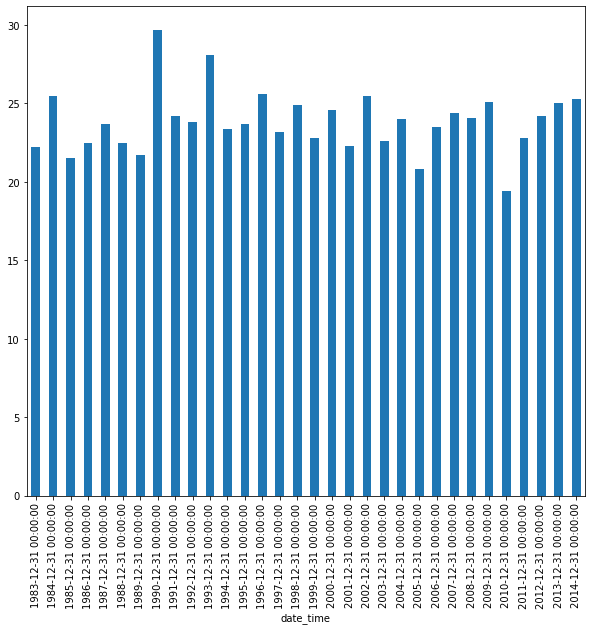

In [35]:
max_ws.plot(kind="bar",figsize=(10,9))

In [36]:
result = fevd(max_ws.values,type="GEV",method="GMLE")

In [37]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 
 [5] "in.data"         "x"               "priorFun"        "priorParams"    
 [9] "method"          "type"            "period.basis"    "par.models"     
[13] "const.loc"       "const.scale"     "const.shape"     "n"              
[17] "na.action"       "parnames"        "results"         "initial.results"



In [38]:
res = result.rx("results")

In [39]:
print(res)

$results
$results$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$results$value
[1] 1e+16

$results$counts
function gradient 
       1        1 

$results$convergence
[1] 0

$results$message
NULL

$results$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$results$num.pars
$results$num.pars$location
[1] 1

$results$num.pars$scale
[1] 1

$results$num.pars$shape
[1] 1






In [40]:
loc, scale, shape = res[0].rx["par"][0]

In [41]:
print(loc, scale, shape)

23.063941519915588 1.7576912874286317 -0.1628816367714792


# Rmagic Function

In [42]:
%load_ext rpy2.ipython

In [43]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES]
             [--type {cairo,cairo-png,Xlib,quartz}] [-c CONVERTER] [-d DISPLAY]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with
    semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R R

In [44]:
# devuelve lo ultimo
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [45]:
%%R
Y = c(2,4,3,9)
lm = lm(Y~X)
summary(lm)


Call:
lm(formula = Y ~ X)

Residuals:
    1     2     3     4 
 0.88 -0.24 -2.28  1.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.0800     2.3000   0.035    0.975
X             1.0400     0.4822   2.157    0.164

Residual standard error: 2.088 on 2 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.549 
F-statistic: 4.651 on 1 and 2 DF,  p-value: 0.1638



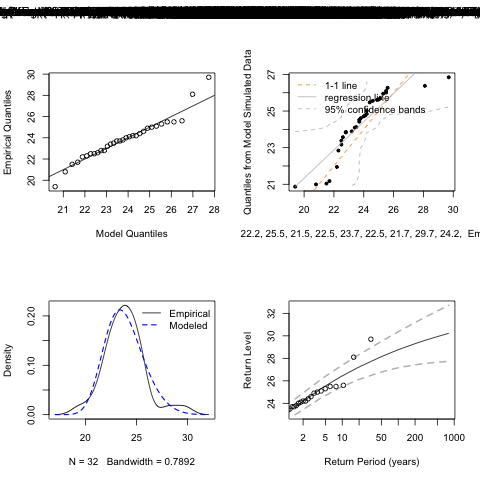

In [46]:
%R -i result plot.fevd(result)

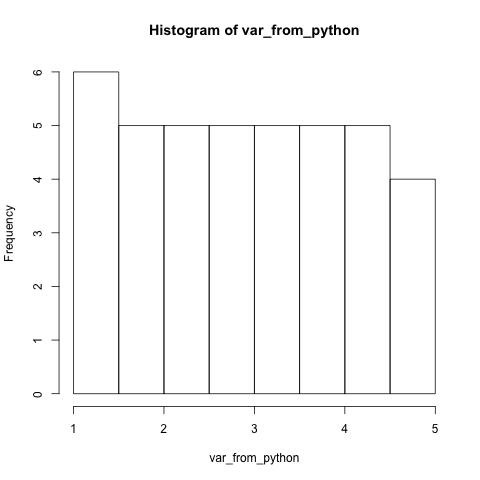

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [48]:
%R -i var_from_python hist(var_from_python)

# Complex Example - RMagic

In [49]:
methods = ["MLE", "GMLE"]
types = ["GEV", "Gumbel"]

Tipo de Ajuste: GEV ; Método del Ajuste: MLE
$par
  location      scale      shape 
23.0517078  1.8085853 -0.1497984 

$value
[1] 66.22729

$counts
function gradient 
      28        6 

$convergence
[1] 0

$message
NULL

$hessian
           location      scale     shape
location  9.1825628 -0.3982934  11.22038
scale    -0.3982934 21.4422632  19.81854
shape    11.2203805 19.8185358 172.17411

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





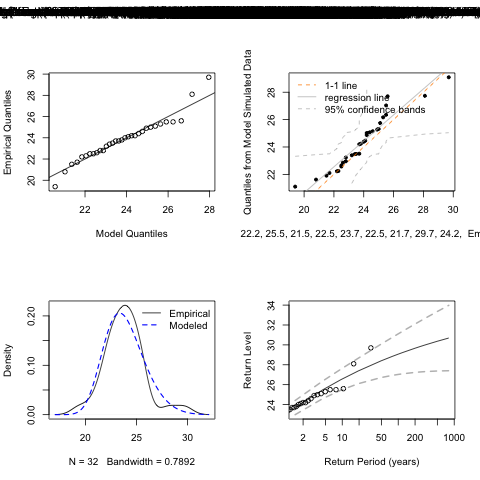

Tipo de Ajuste: GEV ; Método del Ajuste: GMLE
$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





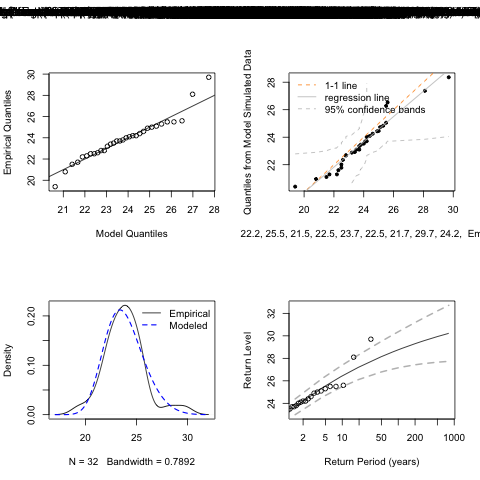

Tipo de Ajuste: Gumbel ; Método del Ajuste: MLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL





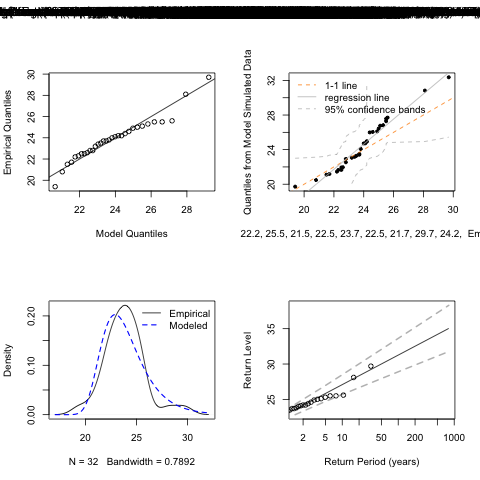

Tipo de Ajuste: Gumbel ; Método del Ajuste: GMLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL





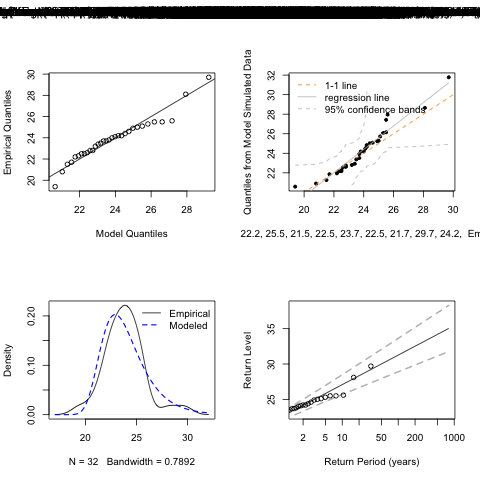

In [50]:
for t in types:
    for m in methods:
        print(f"Tipo de Ajuste: {t} ; Método del Ajuste: {m}")
        result = fevd(max_ws.values, method=m,type=t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)